

Colab Link for ALL 3 TASK :

Task 1 : - https://colab.research.google.com/drive/18bCExWwfVT0g2uWh7tqDr1vsXcjEGx6l#scrollTo=1UEpkujLAWEa

Task 2 : https://colab.research.google.com/drive/1428-0THwtMUC_qGeZX6lieJSwpvEHjGj

Task 3 : https://colab.research.google.com/drive/1UrMuMc_lgAuQnYGTV5ycWNoc5sBdcKQp





*   https://skannai.medium.com/extracting-frames-from-a-video-by-using-opencv-machine-learning-22d832b43d6c
*   https://www.tensorflow.org/tutorials/load_data/video



In [ ]:
import numpy as np
import pandas as pd
import os
import random
import time
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from skimage.filters import prewitt_h, prewitt_v
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import drive
from google.colab.patches import cv2_imshow

%matplotlib inline

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [ ]:


from tensorflow.keras.models import load_model

# Load the saved model
#model_v2 = load_model('/content/drive/My Drive/CS517_Data_Set/modelMobileNet_fine_tuned.h5')
model_Resnet = load_model('/content/drive/My Drive/CS517_Data_Set/ResNet50model_fine_tuned.h5')




In [ ]:

# # Visualize the model architecture
# plot_model(model, show_shapes=True)


In [ ]:
## ################################################## Fucntion to create frame through video and store them #################################3
def preprocess_frame(frame):

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:

        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        digit_region = gray[y:y+h, x:x+w]


        resized_digit = cv2.resize(digit_region, (32, 32))
        input_frame = cv2.cvtColor(resized_digit, cv2.COLOR_GRAY2RGB)

        input_frame = input_frame.astype('float32') / 255.0
        input_frame = np.expand_dims(input_frame, axis=0)


        return input_frame, (x, y, w, h)
    else:

        return None, (0, 0, frame.shape[1], frame.shape[0])



In [ ]:
### ###########################################          Function to  predict digit from each frame ############################################################################333

def predict_from_video(video_path, skip_frames=3, model=None, max_frames=500):
    src = cv2.VideoCapture(video_path)
    predictions = []
    probabilities = []
    frame_count = 0

    while frame_count < max_frames:
        ret, frame = src.read()
        if not ret:
            break

        if frame_count % skip_frames == 0:
            input_frame, bbox = preprocess_frame(frame)
            if input_frame is not None:
                pred = model.predict(input_frame)[0]
                predicted_digit = np.argmax(pred)
                probability = np.max(pred)

                predictions.append(predicted_digit)
                probabilities.append(probability)

                x, y, w, h = bbox
                label = f'Digit: {predicted_digit}, Prob: {probability:.2f}'
                cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)


            cv2_imshow( frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        frame_count += 1

    src.release()
    cv2.destroyAllWindows()

    return predictions, probabilities



In [ ]:
video_path = '/content/drive/My Drive/CS517_Data_Set/REAL_TEST_digit.mp4'
# # predictions = predict_from_video(video_path, model_v2)
predictions, probabilities = predict_from_video(video_path, skip_frames=3, model=model_Resnet)



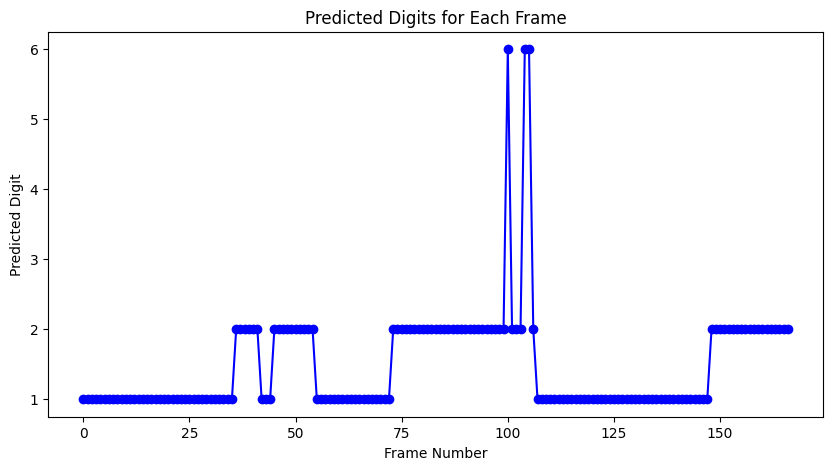

In [ ]:
# Plot the prediction graph
def plot_predictions(predictions):
    plt.figure(figsize=(10, 5))
    plt.plot(predictions, marker='o', linestyle='-', color='b')
    plt.title('Predicted Digits for Each Frame')
    plt.xlabel('Frame Number')
    plt.ylabel('Predicted Digit')
    plt.show()

plot_predictions(predictions)

In [ ]:
def plot_summary(predictions, probabilities):
    unique_predictions = list(set(predictions))
    confidence_avg = [np.mean([prob for pred, prob in zip(predictions, probabilities) if pred == digit]) for digit in unique_predictions]

    plt.figure(figsize=(10, 5))
    plt.bar(unique_predictions, confidence_avg, color='blue')
    plt.xlabel('Digits')
    plt.ylabel('Average Confidence')
    plt.title('Average Confidence for Each Digit Detected')
    plt.xticks(unique_predictions)
    plt.ylim(0, 1)
    plt.show()



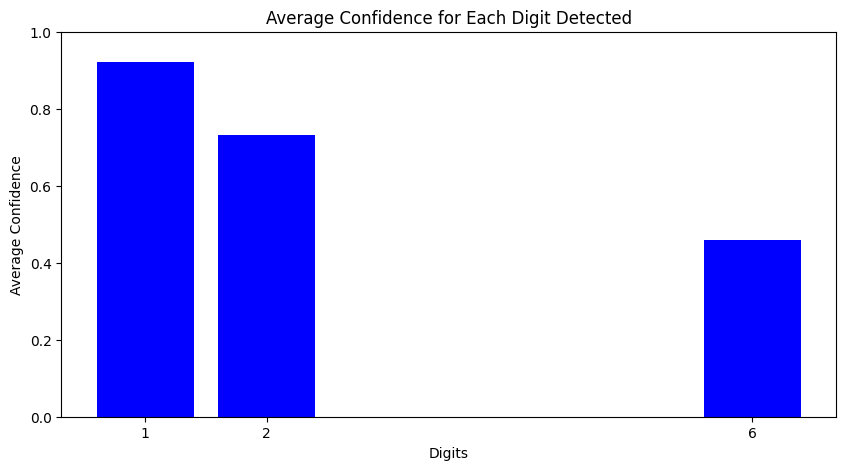

In [ ]:
plot_summary(predictions, probabilities)